IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      45.0 -0.043795   0.016495   -0.491676   0.135540        119.0   
1      51.0 -0.129222   0.032372   -0.700008   0.221338          0.0   
2      27.0 -0.045029   0.009696    0.528975   0.108156          0.0   
3       0.0 -0.055093   0.029366   -1.086720   0.179770          0.0   
4      59.0 -0.070114   0.010217    1.000909   0.122917          0.0   
...     ...       ...        ...         ...        ...          ...   
1344   35.0 -0.044236   0.018199   -0.769808   0.141806         81.0   
1345   79.0 -0.015528   0.017540    3.593408   0.133192          0.0   
1346   56.0  0.006740   0.051350    2.477737   0.226426         89.0   
1347    4.0 -0.014424   0.017951    0.166537   0.134569         76.0   
1348   25.0 -0.026179   0.019685   -0.108298   0.142540         81.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            98.0    4.512884    3.022614  0.000212  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.043795   0.016495   -0.491676   0.135540        119.0         98.0   
1    -0.129222   0.032372   -0.700008   0.221338          0.0        129.0   
2    -0.045029   0.009696    0.528975   0.108156          0.0         77.0   
3    -0.055093   0.029366   -1.086720   0.179770          0.0        100.0   
4    -0.070114   0.010217    1.000909   0.122917          0.0        126.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.044236   0.018199   -0.769808   0.141806         81.0         79.0   
1345 -0.015528   0.017540    3.593408   0.133192          0.0        108.0   
1346  0.006740   0.051350    2.477737   0.226426         89.0        114.0   
1347 -0.014424   0.017951    0.166537   0.134569         76.0         98.0   
1348 -0.026179   0.019685   -0.108298   0.142540         81.0        107.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340  -0.05007   0.016133   -0.495878   0.136392        110.0        134.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    4.344065     3.15001  0.007219    0.02561  ...       9012.313224   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340          3.40271          0.309016          -1.006787          3.447714   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               150.0               147.0           9.832781   

     amp2(Curr(ESC_5))  Guasto  
340           9.513925       2  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.043795   0.016495   -0.491676   0.135540        119.0         98.0   
1    -0.129222   0.032372   -0.700008   0.221338          0.0        129.0   
2    -0.045029   0.009696    0.528975   0.108156          0.0         77.0   
3    -0.055093   0.029366   -1.086720   0.179770          0.0        100.0   
4    -0.070114   0.010217    1.000909   0.122917          0.0        126.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.044236   0.018199   -0.769808   0.141806         81.0         79.0   
1345 -0.015528   0.017540    3.593408   0.133192          0.0        108.0   
1346  0.006740   0.051350    2.477737   0.226426         89.0        114.0   
1347 -0.014424   0.017951    0.166537   0.134569         76.0         98.0   
1348 -0.026179   0.019685   -0.108298   0.142540         81.0        107.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.043795   0.016495   -0.491676   0.135540   119.000000    98.000000   
1    -0.129222   0.032372   -0.700008   0.221338     0.000000   129.000000   
2    -0.045029   0.009696    0.528975   0.108156     0.000000    77.000000   
3    -0.055093   0.029366   -1.086720   0.179770     0.000000   100.000000   
4    -0.070114   0.010217    1.000909   0.122917     0.000000   126.000000   
...        ...        ...         ...        ...          ...          ...   
1615  0.001695   0.007145   -0.307909   0.084444     0.000000   110.483213   
1616 -0.114144   0.040044   -0.466872   0.230138    58.846978    73.080338   
1617 -0.015986   0.006275   -0.348419   0.080704    69.390837    78.866855   
1618 -0.140731   0.039541   -1.467954   0.243410    96.549043    95.549043   
1619  0.009781   0.007587   -0.462467   0.087528    81.304612    67.299227   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=20)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=20, score_func=<function f_regression at 0x000001CE0B36D2D0>)
[False False False False False False False False  True  True False  True
  True False  True False False False False False False False  True False
 False False False False  True False False False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False  True False  True False  True False False False
 False False False False False False False False  True  True False False
 False False False False False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.286156
28         freq1(AccX)  3.468090
12         freq1(GyrY)  3.138211
11           RMS(GyrY)  2.841899
93   freq2(RPM(ESC_1))  2.758021
92   freq1(RPM(ESC_1))  2.755535
9            var(GyrY)  2.674168
153   kurt(RPM(ESC_5))  2.538211
14          amp1(GyrY)  2.465907
159   var(Curr(ESC_5))  2.143378
104     <>(RPM(ESC_2))  1.945667
8             <>(GyrY)  1.794966
78    amp1(RPM(ESC_0))  1.772222
152    var(RPM(ESC_5))  1.705836
107    RMS(RPM(ESC_2))  1.662551
22          amp1(GyrZ)  1.513794
32            <>(AccY)  1.450502
62         amp1(Pitch)  1.220287
80     <>(Curr(ESC_0))  1.084756
76   freq1(RPM(ESC_0))  1.060211
17           var(GyrZ)  1.051620
30          amp1(AccX)  1.044902
19           RMS(GyrZ)  1.015821
77   freq2(RPM(ESC_0))  0.896985
57          var(Pitch)  0.895887
4          freq1(GyrX)  0.879710
15          amp2(GyrY)  0.739178
83    RMS(Curr(ESC_0))  0.679910
156   amp1(RPM(ESC_5))  0.675295
97    var(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  amp1(GyrZ)  \
0     0.000212   0.026845   0.163638     0.000000   23.297300    1.628723   
1    -0.000120   0.005560   0.074474    85.000000    2.717192    2.097304   
2     0.049622   0.004914   0.085809   106.000000    2.703704    2.145079   
3    -0.010972   0.007536   0.087376    99.000000    2.412127    0.682731   
4     0.018252   0.006885   0.084860   117.000000    5.531056    4.391539   
...        ...        ...        ...          ...         ...         ...   
1615  0.014320   0.005437   0.075026   123.702188    3.701106    0.827161   
1616  0.046723   0.010476   0.112388    97.769702    6.463814    0.665029   
1617  0.042902   0.012997   0.121664   108.478167   13.785898    2.089864   
1618  0.026218   0.008739   0.096977   106.806733    2.769264    2.038533   
1619  0.021498   0.005590   0.077696    95.978459    1.812412    0.883766   

      freq1(AccX)  <>(AccY)  kurt(AccY)  amp1(Pitch)  freq1(RPM(ESC_0))  \


In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  amp1(GyrZ)  \
340  0.007219    0.02561   0.160007          0.0   16.348084    1.669966   

     freq1(AccX)  <>(AccY)  kurt(AccY)  amp1(Pitch)  freq1(RPM(ESC_0))  \
340          0.0  0.687728   -0.164004   439.057397               43.0   

     amp1(RPM(ESC_0))  <>(Curr(ESC_0))  freq1(RPM(ESC_1))  freq2(RPM(ESC_1))  \
340       27558.65234         3.893318              117.0              116.0   

     <>(RPM(ESC_2))  RMS(RPM(ESC_2))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  \
340     5582.126168      5623.804498    271901.755696          0.229859   

     var(Curr(ESC_5))  
340          0.309016  


In [ ]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.6):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrY)  var(GyrY)  amp1(GyrZ)  <>(AccY)  kurt(AccY)  amp1(Pitch)  \
0     0.000212   0.026845    1.628723  0.679159   -0.206489   362.010752   
1    -0.000120   0.005560    2.097304  0.451122   -0.697598     1.151328   
2     0.049622   0.004914    2.145079  0.208031   -0.594364    72.076639   
3    -0.010972   0.007536    0.682731  0.493040    0.379004   131.014279   
4     0.018252   0.006885    4.391539  0.287552   -0.211792    13.501478   
...        ...        ...         ...       ...         ...          ...   
1615  0.014320   0.005437    0.827161  0.304000    0.433409     8.425464   
1616  0.046723   0.010476    0.665029  0.261016    1.442615    36.687045   
1617  0.042902   0.012997    2.089864  0.186650    0.001826    11.179579   
1618  0.026218   0.008739    2.038533  0.445915   -0.221270    30.158998   
1619  0.021498   0.005590    0.883766  0.297961    0.091157    19.818461   

      freq1(RPM(ESC_0))  <>(Curr(ESC_0))  freq1(RPM(ESC_1))  <>(RPM(ESC_2))  \
0       

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrY)  var(GyrY)  amp1(GyrZ)  <>(AccY)  kurt(AccY)  amp1(Pitch)  \
340  0.007219    0.02561    1.669966  0.687728   -0.164004   439.057397   

     freq1(RPM(ESC_0))  <>(Curr(ESC_0))  freq1(RPM(ESC_1))  <>(RPM(ESC_2))  \
340               43.0         3.893318              117.0     5582.126168   

     var(RPM(ESC_5))  kurt(RPM(ESC_5))  var(Curr(ESC_5))  
340    271901.755696          0.229859          0.309016  


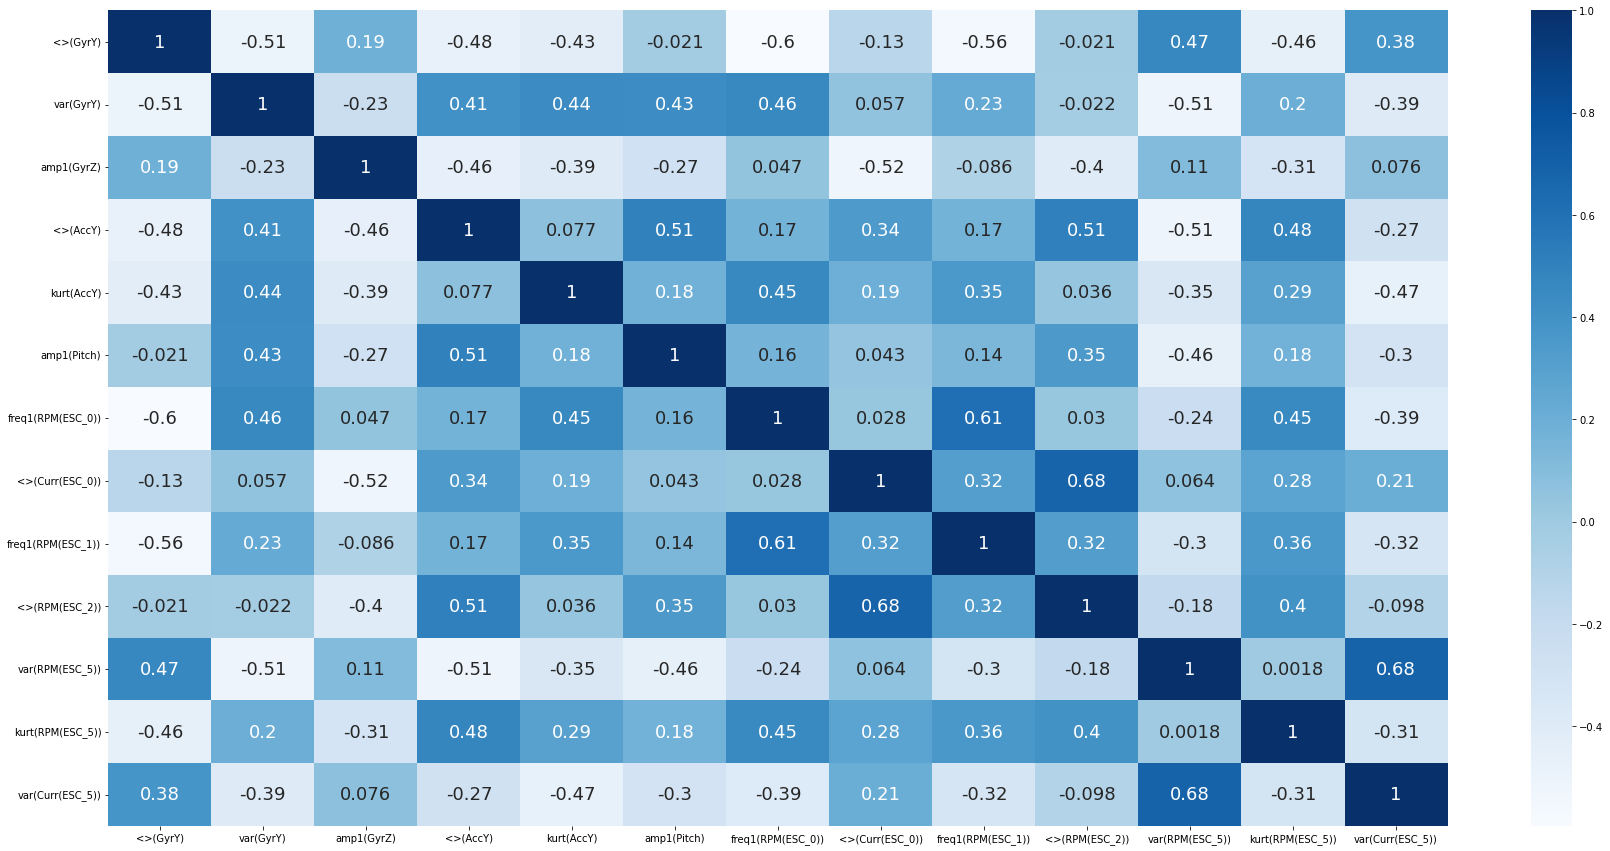

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1296, 13)
(324, 13)
(1296, 1)
(324, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs), # Stochastic Gradient Descent 
    Perceptron(random_state=rs)
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [23]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    i += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Cross-Validation: [0.85769231 0.85714286 0.8030888  0.76447876 0.88416988]
Accuracy: 0.78 	 ---> LogisticRegression 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.65384615 0.69498069 0.68725869 0.71042471 0.67181467]
Accuracy: 0.69 	 ---> SVC 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.62692308 0.32818533 0.56756757 0.56756757 0.50965251]
Accuracy: 0.51 	 ---> MLPClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.32692308 0.66795367 0.66795367 0.37451737 0.56370656]
Accuracy: 0.32 	 ---> SGDClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.33461538 0.33204633 0.33590734 0.32818533 0.32818533]
Accuracy: 0.33 	 ---> Perceptron 
Test: 0    1
Name: Guasto_test, dtype: int64
-----------

### Matrici di confusione

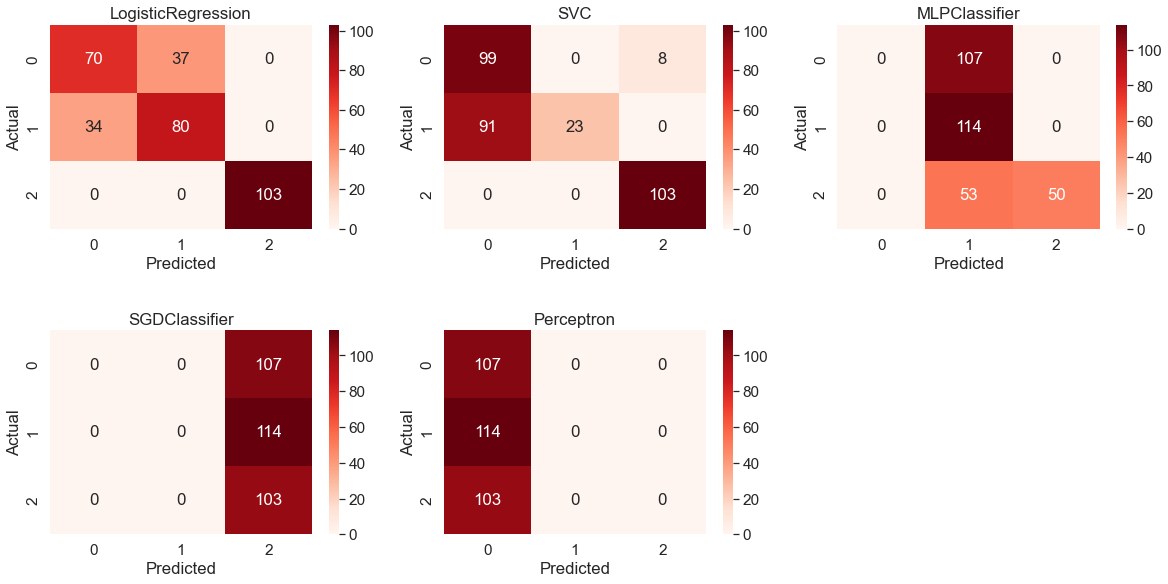

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])